# Instalando Sklearnex

https://intel.github.io/scikit-learn-intelex/index.html

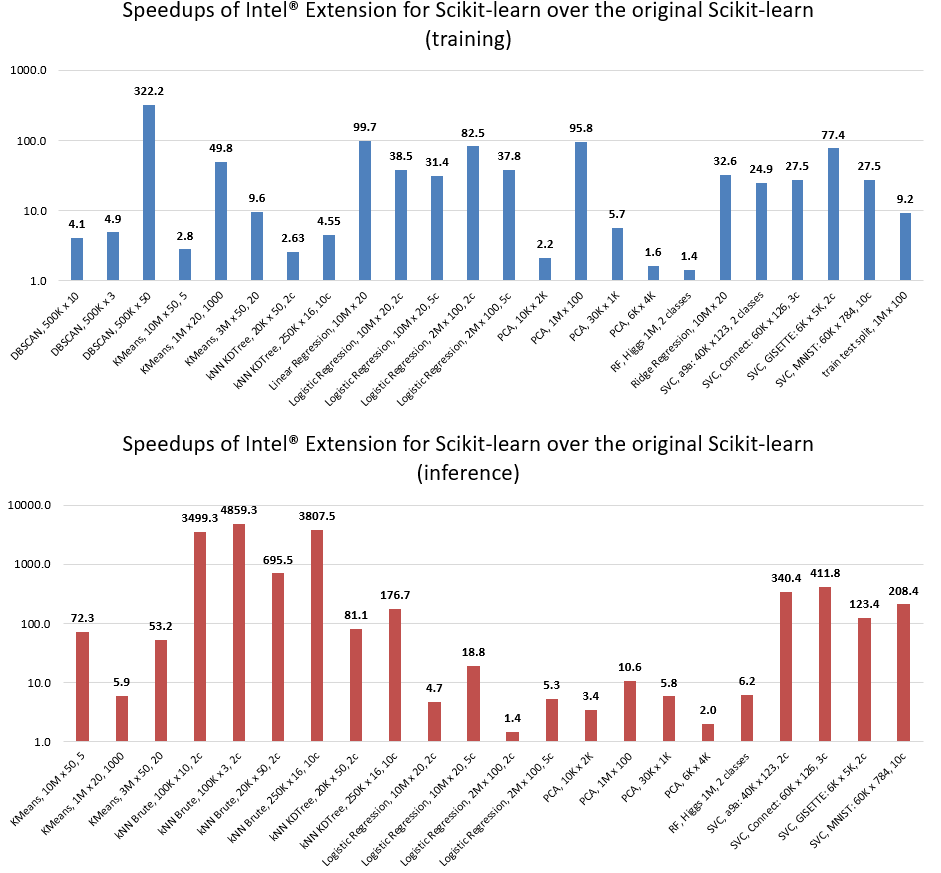

In [5]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [2]:
!pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 7.0 MB/s eta 0:00:00


Google colab is currently running on Debian system. One of the changes you may encounter on a Debian system is dist-packages instead of site-packages. Third party Python software installed from Debian packages goes into dist-packages, not site-packages. We are working on support for Debian systems and it should be fixed in the next release. For now, I can suggest the following workaround:

Fonte: https://githubmemory.com/repo/IntelPython/daal4py/issues/634

In [3]:
import sys
import os
import site
sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))

# Carregando Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


# Carregando Pacotes

In [7]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from pathlib import Path
import shutil
from joblib import dump, load

# Parâmetros

In [9]:
#Path base de dados Drive

nome_modelo = 'vgg'
nome_zip =  nome_modelo + '.zip'

dir_path = Path('/content/drive/MyDrive/CI1394/')
zip_path = dir_path/nome_zip

#Salvar modelo

nome_joblib = 'knn_' + nome_modelo + '.joblib'
dir_path_modelo = Path('/content/drive/MyDrive/CI1394/modelos/')
joblib_path_modelo = dir_path_modelo/nome_joblib

# Carregando Base de Dados

In [10]:
!cp {zip_path} .
!unzip -q {nome_zip}
!rm {nome_zip}

In [12]:
path_X_train = '/content/' + nome_modelo + '/X_train.npy'
path_y_train = '/content/' + nome_modelo + '/y_train.npy'
path_X_test = '/content/' + nome_modelo + '/X_test.npy'
path_y_test = '/content/' + nome_modelo + '/y_test.npy'

In [13]:
X_train = np.load(path_X_train)
y_train = np.load(path_y_train)
X_test = np.load(path_X_test)
y_test = np.load(path_y_test)

In [14]:
print(y_train)

[ 0  0  0 ... 13 13 13]


In [15]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
print(y_train)

[7 2 2 ... 5 5 3]


#KNN

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Resultados

In [17]:
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.4f}".format(acc))

Acurácia: 0.4974


In [18]:
print(confusion_matrix(y_test, y_pred))

[[40  0  1  0  1  0  0  0 13  0  0  0  1  0]
 [ 0 32 12  1  2  0  0  0  6  0  1  0  0  2]
 [ 0  0 33  3  4  2  2  0 12  0  0  0  0  0]
 [ 0  0 23 26  0  0  0  2  5  0  0  0  0  0]
 [ 0  0  1  2 29  0  5 10  9  0  0  0  0  0]
 [ 0  0 14  3  5 23  0  0 10  1  0  0  0  0]
 [ 0  0  7  2  9  1 27  2  5  0  3  0  0  0]
 [ 0  1  4  0 15  0  2 25  8  1  0  0  0  0]
 [ 0  1  8  0  2  0 18  0 25  0  1  0  0  1]
 [ 0  0 12  0  0  0  1  0 12 29  0  0  0  2]
 [ 0  0  3  0  1  1  4  1  4  0 42  0  0  0]
 [ 0  2 12  0  4  0  0  0 21  0  0  8  9  0]
 [ 0  0 13  0  3  0  0  3 18  0  0  3 16  0]
 [ 0  0  6  0  0  0  0  2  7  3  0  0  3 35]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        56
           1       0.89      0.57      0.70        56
           2       0.22      0.59      0.32        56
           3       0.70      0.46      0.56        56
           4       0.39      0.52      0.44        56
           5       0.85      0.41      0.55        56
           6       0.46      0.48      0.47        56
           7       0.56      0.45      0.50        56
           8       0.16      0.45      0.24        56
           9       0.85      0.52      0.64        56
          10       0.89      0.75      0.82        56
          11       0.73      0.14      0.24        56
          12       0.55      0.29      0.38        56
          13       0.88      0.62      0.73        56

    accuracy                           0.50       784
   macro avg       0.65      0.50      0.53       784
weighted avg       0.65      0.50      0.53       784



# Salvar Modelo

https://scikit-learn.org/stable/modules/model_persistence.html

In [ ]:
dump(knn, nome_joblib) #Salvar

['knn_vgg.joblib']

In [ ]:
model = load(nome_joblib) #Carregar

# Copiando para o drive

In [ ]:
shutil.copyfile(nome_joblib, joblib_path_modelo)

PosixPath('/content/drive/MyDrive/CI1394/modelos/knn_vgg.joblib')